# 1.8 Million cells

This example shows the speed of SpatialTis when perform analysis on large-scale dataset.

In [1]:
%config InlineBackend.figure_format='retina'
import anndata as ad
import spatialtis as st
import spatialtis.plotting as sp
from spatialtis import Config

In [2]:
data = ad.read_h5ad("../data/IMC-diabetes.h5ad")
data.obs.head(5)

C:\Users\Milk\anaconda3\envs\spatialtis\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,area,eccentricity,islet_id,centroid,image,case,slide,part,group,stage,cell_cat,cell_type,n_genes,neighbors_ix,cell_neighbors,cell_neighbors_count
0,12,0.837664,0,"(52.5, 0.6666666666666666)",A01,6362,A,Tail,1,Onset,exocrine,acinar,30,0,"[0, 71, 50]",3
1,19,0.902864,0,"(128.0, 0.894736842105263)",A01,6362,A,Tail,1,Onset,exocrine,acinar,36,1,"[87, 2, 1, 58]",4
2,7,0.882300,0,"(135.28571428571428, 0.42857142857142855)",A01,6362,A,Tail,1,Onset,exocrine,acinar,30,2,"[44, 87, 2, 1]",4
3,19,0.784367,0,"(449.5263157894737, 1.1578947368421053)",A01,6362,A,Tail,1,Onset,exocrine,acinar,33,3,"[64, 3, 4]",3
4,30,0.930895,0,"(458.3666666666666, 1.1)",A01,6362,A,Tail,1,Onset,exocrine,acinar,38,4,"[64, 3, 4, 55]",4


In [9]:
data

AnnData object with n_obs × n_vars = 1776974 × 38
    obs: 'area', 'eccentricity', 'islet_id', 'centroid', 'image', 'case', 'slide', 'part', 'group', 'stage', 'cell_cat', 'cell_type', 'n_genes', 'neighbors_ix', 'cell_neighbors', 'cell_neighbors_count', 'cell_id'
    var: 'markers', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_components', 'cell_density', 'co_expression', 'hvg', 'neighborhood_analysis', 'shannon_entropy', 'spatial_entropy', 'sscmap_computed', 'cell_interaction'

In [3]:
st.transform_points(data, 'centroid')

In [4]:
Config.exp_obs = ['stage', 'part', 'case', 'image']
Config.cell_type_key = 'cell_type'
Config.marker_key = 'markers'

In [5]:
Config.progress_bar = True

⏳ Cell components

📦 Added to AnnData, uns: 'cell_components'

⏱ 3s566ms

<AxesSubplot:xlabel='stage', ylabel='count'>

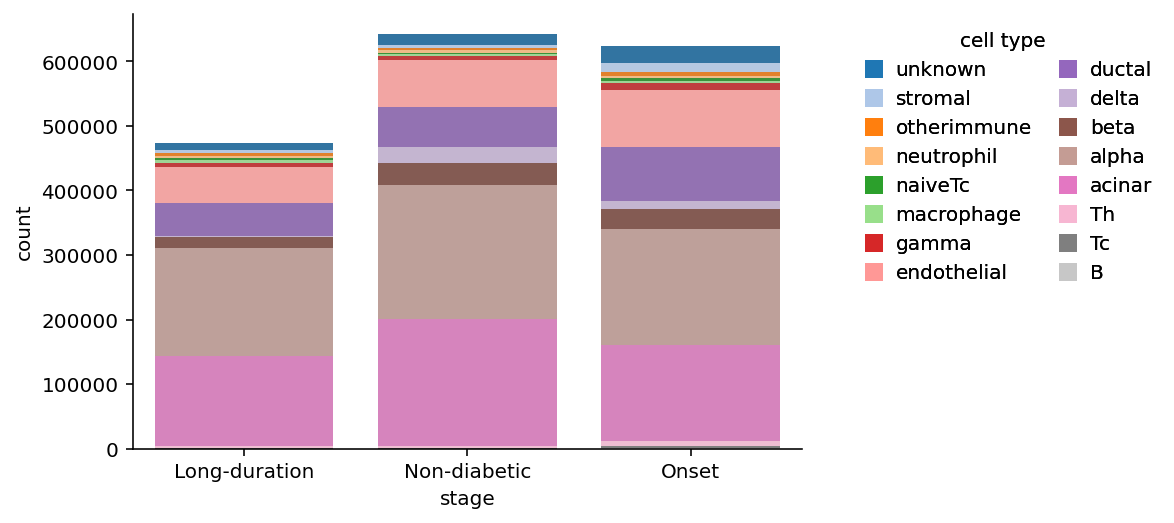

In [6]:
_ = st.cell_components(data)
sp.cell_components(data, groupby='stage')

In [7]:
_ = st.find_neighbors(data, r=25)

⏳ Find neighbors

🛠 Method: kdtree

Output()

📦 Added to AnnData, obs: 'cell_neighbors'

📦 Added to AnnData, obs: 'cell_neighbors_count'

⏱ 17s260ms

In [8]:
_ = st.cell_interaction(data)

⏳ Cell interaction

Output()

📦 Added to AnnData, uns: 'cell_interaction'

⏱ 3m1s